In [17]:
library(patchwork)
library(ggplot2)
library(magick)
library(tidytext)
library(SingleCellExperiment)
library(tidyHeatmap)
library(dplyr)
library(tidyr)
library(plotgardener)
library(ggplot2)
library(ggrepel)
library(gridExtra)
source('./ABCA7lof2/plotting.r')

In [292]:
cols = c('grey', 'red')
names(cols) = c('Con', 'LoF')
colors = readRDS('./processed_data//Cell_group_colors.rds')

<u>**Figure 1**</u>
<a name="F1"></a>

In [301]:
colData = read.csv('./processed_data/single_cell/colData.csv')
coords = colData[,c('x', 'y', 'ABCA7LoF', 'projid', 'leiden_clusters', 'annotations2', 'gaussian_liklihood')]
coords$ABCA7LoF = ifelse(coords$ABCA7LoF==1, 'LoF', 'Con')

coords = read.csv('../ABCA7lof//processed_data//for_plotting/umap_coords.csv', row.names=1)


In [4]:
sce = readRDS('./processed_data/single_cell/sce.rds')
coords$ABCA7 = logcounts(sce)['ABCA7',]

In [9]:
# plot cartoon
abca7_gene = image_ggplot(image_read('../ABCA7lof/svgs/abca7_gene.png'))
cohort_cartoon = image_ggplot(image_trim(image_read('../ABCA7lof/svgs/cohort_cartoon.png')))

In [37]:
abca7_expression = plot_coords_by_gene(coords, 'x', 'y', 'ABCA7', 'node_centrality', low='white', high='red')

In [38]:
# plot cells
size=4
cells_plot = plot_coords_by_grp(coords, 'x', 'y', 'celltype', 'node_centrality', colors)+annotate(geom="text", x=-2, y=13, label="Excitatory Neurons",color=colors['Ex'], size=size, fontface='italic')+
annotate(geom="text", x=9, y=-1, label="Oligodendrocytes",color=colors['Oli'], size=size, fontface='italic')+
annotate(geom="text", x=7, y=-14, label="Astrocytes",color=colors['Ast'], size=size, fontface='italic')+
annotate(geom="text", x=4, y=10, label="Inhibitory Neurons",color=colors['In'], size=size, fontface='italic')+
annotate(geom="text", x=12, y=3, label="Microglia",color=colors['Mic'], size=size, fontface='italic')+
annotate(geom="text", x=2, y=-5, label="OPCs",color=colors['Opc'], size=size, fontface='italic')+
annotate(geom="text", x=-7, y=-11, label="Vascular Cells",color=colors['Endo'], size=size, fontface='italic')

In [302]:
# plot LoF
size=4
coords$LoF = ifelse(coords$LoF=='LOF', 'LoF', 'Con')
lof_plot = plot_coords_by_grp(coords, 'x', 'y', 'LoF', 'node_centrality', cols)#+annotate(geom="text", x=-2, y=13, label="Excitatory Neurons",color=colors['Ex'], size=size, fontface='italic')

In [183]:
ex_u = image_ggplot((image_read_pdf('./pdf_figures/Exumap.pdf')))
in_u = image_ggplot((image_read_pdf('./pdf_figures/Inumap.pdf')))
ast_u = image_ggplot((image_read_pdf('./pdf_figures/Astumap.pdf')))
mic_u = image_ggplot((image_read_pdf('./pdf_figures/Micumap.pdf')))
oli_u = image_ggplot((image_read_pdf('./pdf_figures/Oliumap.pdf')))
opc_u = image_ggplot((image_read_pdf('./pdf_figures/Opcumap.pdf')))
overview = image_ggplot((image_read_pdf('./pdf_figures/cluster_overview.pdf')))
overview1 = image_ggplot((image_read_pdf('./pdf_figures/Exumap_exp_overview.pdf')))

bar = image_ggplot(image_trim(image_read_pdf('./pdf_figures/clusters_barplot.pdf')))

In [146]:
ex_uc = image_ggplot(image_trim(image_read_pdf('./pdf_figures/Exumap_clust.pdf')))
in_uc = image_ggplot(image_trim(image_read_pdf('./pdf_figures/Inumap_clust.pdf')))
ast_uc = image_ggplot(image_trim(image_read_pdf('./pdf_figures/Astumap_clust.pdf')))
mic_uc = image_ggplot(image_trim(image_read_pdf('./pdf_figures/Micumap_clust.pdf')))
oli_uc = image_ggplot(image_trim(image_read_pdf('./pdf_figures/Oliumap_clust.pdf')))
opc_uc = image_ggplot(image_trim(image_read_pdf('./pdf_figures/Opcumap_clust.pdf')))

In [91]:
legend = image_ggplot(image_trim(image_read('./pdf_figures/legend.png')))

In [308]:
row1 = ((cohort_cartoon / abca7_gene) | (lof_plot|cells_plot)) + plot_layout(widths=c(2,2))
row2 = (ex_u | in_u | ast_u )/ (mic_u | oli_u | opc_u)
row3 = (ex_uc | in_uc | ast_uc | mic_uc | oli_uc | opc_uc)
row4 = legend | bar

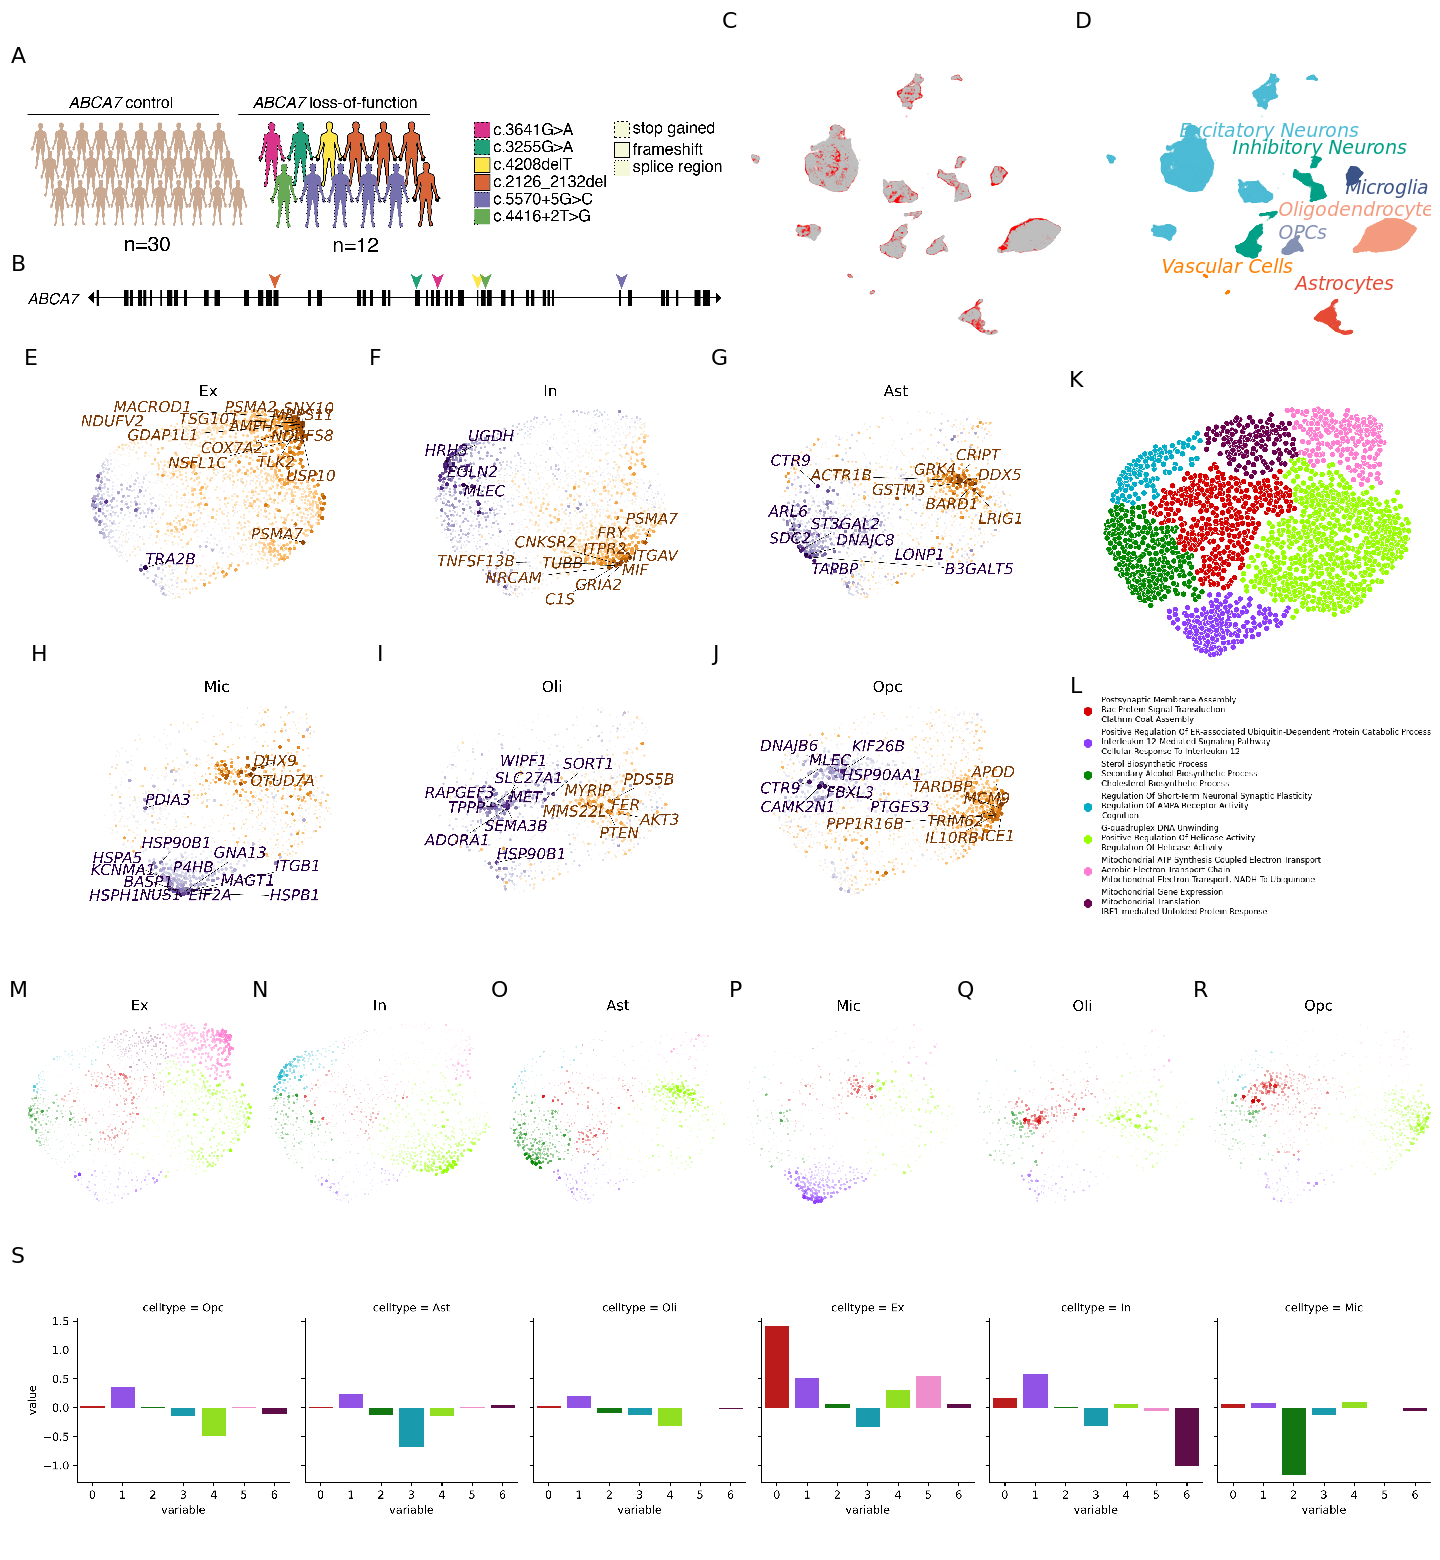

In [309]:
options(repr.plot.width=12, repr.plot.height=13)

(row1 / ((row2|(overview/legend)) + plot_layout(widths=c(3,1))) / row3 / bar) + plot_layout(heights=c(1,2,1,1)) + plot_annotation(tag_levels = 'A')

In [ ]:
# last panel - rank by celltype
# add histograms to supplement
# show individual pathways on middle panel 
# in next figure show expression and KL clustering results (kernighan?) on changing pathways only in Ex (other celltypes in supplement)
# highlight main clusters of interest in subsequent figures

<u>**Figure 3**</u>
<a name="F3"></a>

<u>**Figure 4**</u>
<a name="F4"></a>

<u>**Figure 5**</u>
<a name="F5"></a>

<u>**Figure 6**</u>
<a name="F6"></a>

<u>**Extended Figure X**</u>
<a name="EF5"></a>

png 
  2

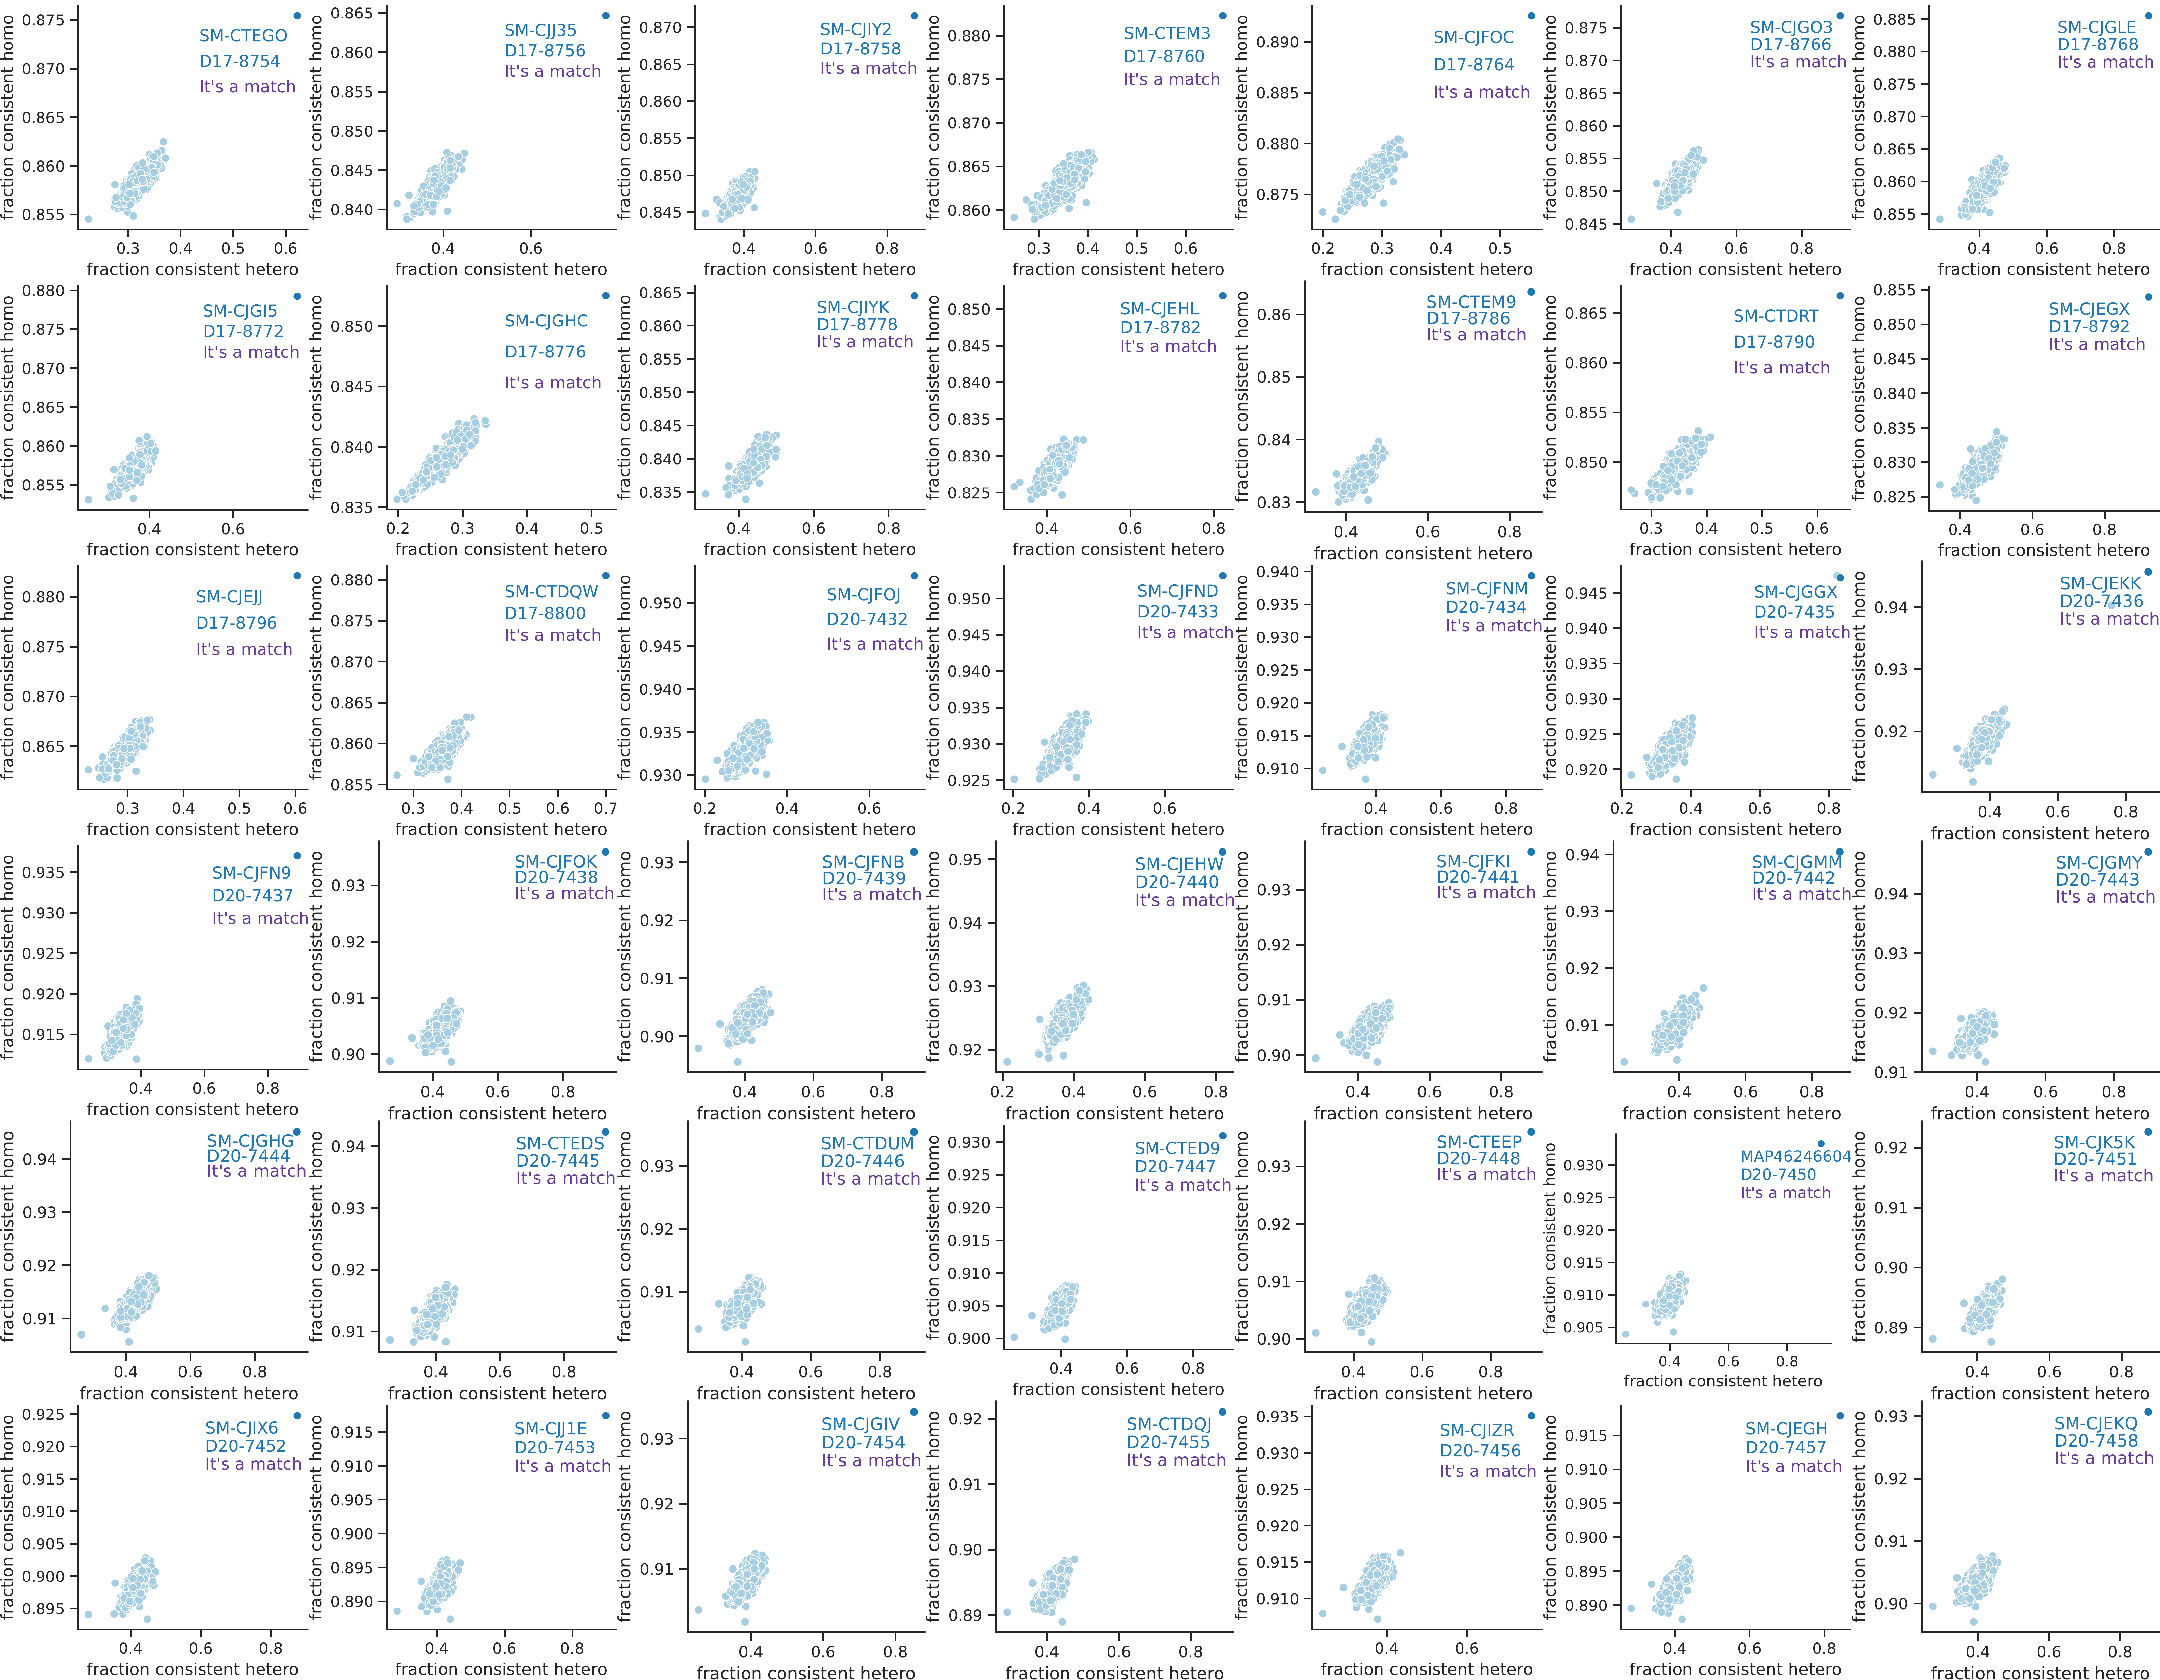

In [40]:
files = list.files(path = "./pdf_figures/.")
files = files[unlist(lapply(files, function(x) endsWith(x,'swap_res.pdf')))]
                            
plots = list()
for(i in 1:length(files)){
    plots[[i]] = image_ggplot(image_trim(image_read_pdf(paste0('./pdf_figures/', files[i]))))
}
     
options(repr.plot.width=18, repr.plot.height=14)

pdf('./pdf_figures/Extended_Figure_X.pdf', width=18, height=14)
do.call("grid.arrange", c(plots, ncol=7))
dev.off()
                            
do.call("grid.arrange", c(plots, ncol=7))
